In [ ]:
#LFW is a dataset of 13 000 pictures of faces and 1680 of these people have two or more distinct photos of temselves
# we are using this for unsupervised pair matching?

In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [6]:
print(type(lfw_people))
n_samples, height, width = lfw_people.images.shape

X = lfw_people.data     #As I understand X is now the two dimensional array containg the info per picture
print(X.shape)
n_features = X.shape[1]

<class 'sklearn.utils._bunch.Bunch'>
(1217, 1850)


In [8]:
y = lfw_people.target   #Labels for the corresponding pictures of faces, id
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1217
n_features: 1850
n_classes: 6


In [9]:
# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled # dataset): unsupervised feature extraction / dimensionality reduction n_components = 150

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled # dataset): unsupervised feature extraction / dimensionality reduction n_components = 150
n_components = 150

In [11]:
# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, height, width))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

(912, 150)
(305, 150)


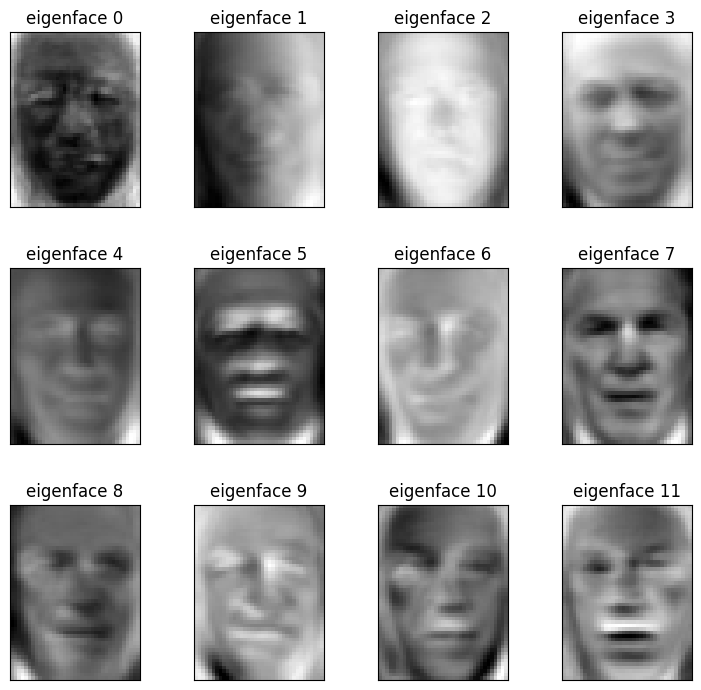

In [13]:
import matplotlib.pyplot as plt
 # Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, height, width, n_row=3, n_col=4):

    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, height, width)

plt.show()

(912,)


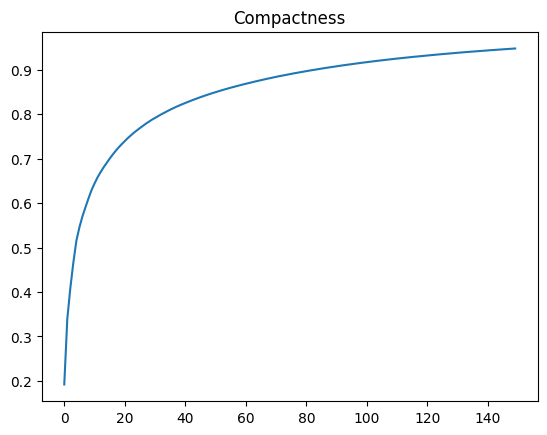

In [14]:
#Evaluating performance of the dimensionality reduction
explained_variance = (S ** 2 ) / (n_samples -1)
total_variance = explained_variance.sum()

explained_variance_ratio = explained_variance / total_variance
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)

plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title("Compactness")
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train)


RandomForestClassifier(max_depth=15, max_features=150, n_estimators=150)

In [16]:
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test

total_test = len(X_test_transformed)
print("Total testing: ", total_test)
print("Predictions: ", predictions)
print("Which Correct: ", correct)
print("Total Correct: ", np.sum(correct))
print("Accuracy: ", np.sum(correct)/total_test)

print(classification_report(y_test, predictions, target_names=target_names))

Total testing:  305
Predictions:  [1 3 1 5 3 1 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 1 1 2 4 3 4 1 1 3 3 2 4 3 3 3
 3 3 1 4 3 3 3 3 3 3 3 3 3 3 1 1 5 3 3 3 3 1 3 3 3 3 3 1 3 1 3 3 1 3 2 1 1
 3 4 3 1 3 3 3 3 4 3 3 3 3 3 4 3 3 3 1 3 5 5 4 5 5 3 3 3 2 3 1 3 3 1 5 1 1
 1 4 3 1 5 3 5 3 3 3 1 1 3 1 3 1 3 3 3 3 3 1 1 3 3 1 3 3 1 5 5 3 3 3 3 5 3
 3 1 3 3 3 3 3 1 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 1 5 5 3 5 1 3 3
 3 3 3 5 1 3 3 3 3 3 3 3 3 1 3 5 3 3 4 3 1 3 3 3 1 3 3 3 3 4 3 1 1 3 3 3 3
 4 3 3 3 1 3 3 5 1 3 3 4 3 3 1 3 3 3 1 1 3 3 3 3 5 3 3 3 1 3 3 5 3 3 2 3 2
 3 3 3 3 3 3 3 1 3 5 3 1 4 3 3 3 3 3 3 3 3 3 1 2 3 3 3 5 5 3 3 3 3 3 3 3 3
 3 5 1 3 3 3 3 3 4]
Which Correct:  [ True False  True  True  True False  True  True  True  True  True  True
 False  True  True False False  True False False False  True  True False
  True  True  True  True False  True  True  True  True False False  True
  True  True False  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  

/Users/larsmoan/Documents/UQ/COMP3710/COMP3710/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/larsmoan/Documents/UQ/COMP3710/COMP3710/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/larsmoan/Documents/UQ/COMP3710/COMP3710/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh